PART 1

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() #load cifar10 data set to variables
K = len(np.unique(y_train)) # Number of Classes
Ntr = x_train.shape[0]      # number of training examples
Nte = x_test.shape[0]       # number of testing examples
Din = 3072                  # By CIFAR10 data set with 32 x 32 color images.so Din=32 x 32 x 3

# Normalize pixel values: Image data preprocessing
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0) # axis=0: mean of a column; Mean of each pixel
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

#This function returns a matrix of binary values.Its rows=length of the input vector and coulmns=the number of classes.

#reshape/flatten the data
x_train = np.reshape(x_train,(Ntr,Din)).astype('float32')
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (50000, 3072)
x_test: (10000, 3072)
y_train: (50000, 10)
y_test: (10000, 10)


In [24]:
batch_size = Ntr # for gradient descent optimization batch size is equal to number of training set
iterations = 300
# epochs
lr = 1.4e-2 # the learning rate alpha
lr_decay= 0.999
reg = 5e-6 #the regularization constant - lamda

In [25]:
loss_history_test = []
loss_history = []
train_acc_history = []
val_acc_history = []
lr_history = []

std=1e-5                            # standard deviation of normal distributaion
w1 = std*np.random.randn(Din, K)    # initialize the w matrix with random values
b1 = np.zeros(K)

for t in range(iterations):
    batch_indices = np.random.choice(Ntr, batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]

    #forward 
    y_pred = x.dot(w1) + b1
    y_pred_test = x_test.dot(w1) + b1
    
    loss_test = (1/Nte)*(np.square(y_test - y_pred_test)).sum() + reg*(np.sum(w1*w1))
    loss_history_test.append(loss_test)
    loss = (1/batch_size)*(np.square(y - y_pred)).sum() + reg*(np.sum(w1*w1))
    loss_history.append(loss)
    
    # compute the accuracy as percentage
    training_acc = 100*(1 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum())  
    testing_acc = 100*(1 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum())
    train_acc_history.append(training_acc)
    val_acc_history.append(testing_acc)

    if t%10 == 0:
        print("epoch %d / %d| training loss %f| testing loss %f training accuracy %f| testing accuracy %f" % (t, iterations, loss, loss_test, training_acc, testing_acc))
    # Backward 
    dy_pred = (1./batch_size)*2.0*(y_pred-y) # partial derivative w.r.t y_predicted
    dw1 = x.T.dot(dy_pred) + reg*w1
    db1 = dy_pred.sum(axis=0)
    #updating learning parameters
    w1 -= lr*dw1 
    b1 -= lr*db1
    lr *= lr_decay
    
    lr_history.append(lr)

epoch 0 / 300| training loss 1.000000| testing loss 0.999995 training accuracy 67.132800| testing accuracy 67.269000
epoch 10 / 300| training loss 0.877115| testing loss 0.876241 training accuracy 75.520400| testing accuracy 75.849000
epoch 20 / 300| training loss 0.842699| testing loss 0.842585 training accuracy 76.068400| testing accuracy 76.628000
epoch 30 / 300| training loss 0.823678| testing loss 0.823810 training accuracy 76.835800| testing accuracy 77.034000
epoch 40 / 300| training loss 0.812207| testing loss 0.812819 training accuracy 76.695800| testing accuracy 77.155000
epoch 50 / 300| training loss 0.804584| testing loss 0.805967 training accuracy 76.842000| testing accuracy 77.199000
epoch 60 / 300| training loss 0.801045| testing loss 0.801766 training accuracy 77.049600| testing accuracy 77.317000
epoch 70 / 300| training loss 0.797652| testing loss 0.798891 training accuracy 77.313200| testing accuracy 77.388000
epoch 80 / 300| training loss 0.796334| testing loss 0.79

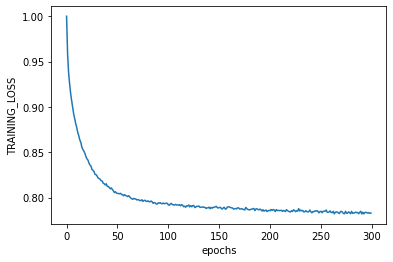

In [26]:
fig, axes = plt.subplots()
axes.plot(loss_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("TRAINING_LOSS")
plt.show()
fig.savefig('LOSS.png',transparent=True)

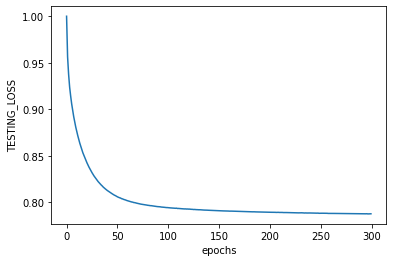

In [27]:
fig, axes = plt.subplots()
axes.plot(loss_history_test)  
axes.set_xlabel("epochs")
axes.set_ylabel("TESTING_LOSS")
plt.show()
fig.savefig('testing_loss.png',transparent=True)

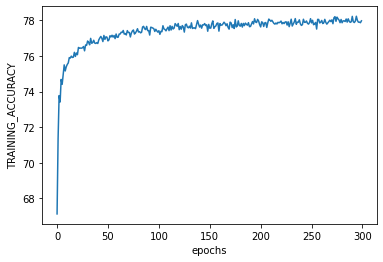

In [28]:
fig, axes = plt.subplots() 
axes.plot(train_acc_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("TRAINING_ACCURACY")
plt.show()
fig.savefig('training accuracy.png',transparent=True)

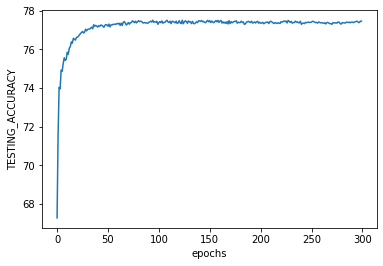

In [29]:
fig, axes = plt.subplots() 
axes.plot(val_acc_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("TESTING_ACCURACY")
plt.show()
fig.savefig('testing accuracy.png',transparent=True)

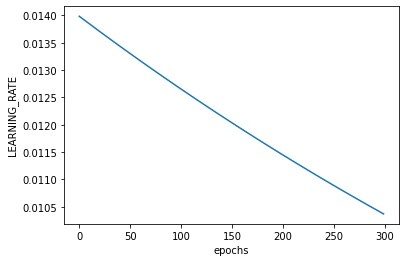

In [30]:
fig, axes = plt.subplots() 
axes.plot(lr_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("LEARNING_RATE")
plt.show()
fig.savefig('learning rate.png',transparent=True)

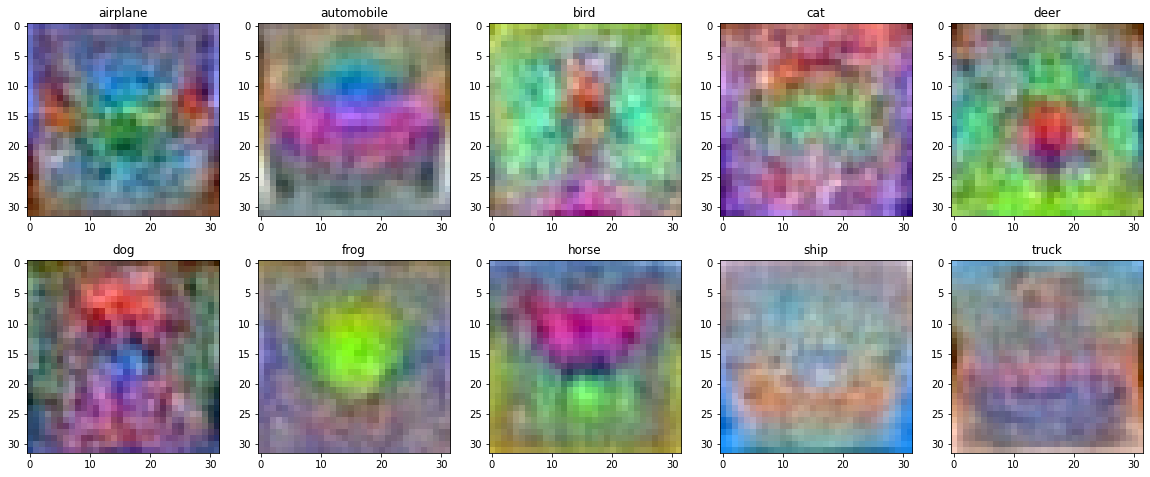

In [31]:
imgs_for_w1=[]
titles_of_imgs = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(w1.shape[1]):
    temp = np.reshape(w1[:,i]*255,(32,32,3))
    temp = cv.normalize(temp, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    imgs_for_w1.append(temp)
fig,ax = plt.subplots(2,5,figsize=(20,8))
# show resultant image as a type of 2 x 5 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(imgs_for_w1[i*5+j], vmin=0, vmax=255)
        ax[i,j].set_title(titles_of_imgs[i*5+j])
plt.show()
fig.savefig('img_for_w1',transparent=True)